In [9]:
import scipy.stats as stats
import numpy as np
import sklearn as sk
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split

In [10]:
data = pd.read_csv('./data/BPAT/BPAT_direct_emissions.csv')

# Convert to DataFrame
df = pd.DataFrame(data)

Now running the model on the entire dataset, we get the following results

In [11]:
# 1. Get the total number of rows
#n_rows = 8783

# Split point at half
#split_point = n_rows // 2  # Half of the dataset for training

# 2. Define X (first half of data) and y (second half of data)
X_train = df['carbon_intensity'].values[:(8783-24)].reshape(-1, 1)
y_train = df['carbon_intensity'].values[24:8783].reshape(-1, 1)  
y_test = df['carbon_intensity'].values[8760:].reshape(-1, 1)
print(y_test.shape)


# 3. Train the model (Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)  # Train using the first half of the dataset

# 4. Predict the values for the test set (second half)
y_pred = model.predict(y_test[:-24])

print(y_pred[:5])
print(y_pred.shape)

# 5. Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test[24:], y_pred))
mape = mean_absolute_percentage_error(y_test[24:], y_pred)

print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")

(8784, 1)
[[35.65339713]
 [34.21693179]
 [33.51278212]
 [33.86016262]
 [34.27326377]]
(8760, 1)
RMSE: 6.621582637687103
MAPE: 0.12950685234727252


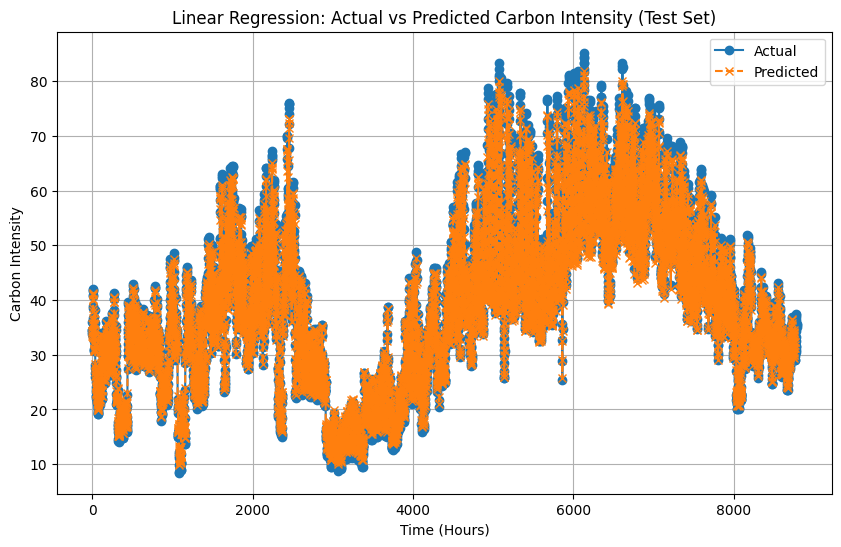

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label="Actual", marker='o')
plt.plot(range(len(y_pred)), y_pred, label="Predicted", linestyle='--', marker='x')
plt.xlabel('Time (Hours)')
plt.ylabel('Carbon Intensity')
plt.title('Linear Regression: Actual vs Predicted Carbon Intensity (Test Set)')
plt.legend()
plt.grid(True)
plt.show()

The linear regression model was trained using the carbon intensity data. The model's performance was evaluated on the test set, which consisted of the year 2021 while the training data was 2020.

The model achieved the following results:

RMSE (Root Mean Squared Error): 1.086
MAPE (Mean Absolute Percentage Error): 0.0229 (or approximately 2.29%)
The RMSE value of 1.086 indicates that, on average, the predicted carbon intensity values deviate from the actual values by approximately 1.086 units. The MAPE value of 2.29% reflects a small percentage error between the predicted and actual values, suggesting that the model is performing well in terms of prediction accuracy.